In [2]:
#1 Make visualization explaining which name was the most popular in each state before and after 1990 year;
#2 which are top 3 of the most popular names in 1990-2000 years separately among boys and girls in three states selected by you
#3 dynamics of three names selected by you in those three states starting from 1990 year

# Imports

In [11]:
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

# 1 Make visualization explaining which name was the most popular in each state before and after 1990 year



In [90]:
#DATA loading
df = pd.read_csv('./StateNames.csv', index_col = "Id")
#some preprocessing
#Let's create subsets for before and after 1990
before1990 = df[df['Year'] <= 1990]
after1990 = df[df['Year'] > 1990]
#now we need to group them by states
before1990 = before1990.groupby(['State', 'Name'], as_index=False).aggregate({'Count':'sum'})
after1990 = after1990.groupby(['State', 'Name'], as_index=False).aggregate({'Count':'sum'})
#And now we need to extract names with the largest numbers of occurences
before1990_sorted = before1990.sort_values('Count', ascending=False).drop_duplicates(['State'])
after1990_sorted = after1990.sort_values('Count', ascending=False).drop_duplicates(['State'])


/Users/GuloLynx/Library/Python/2.7/lib/python/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


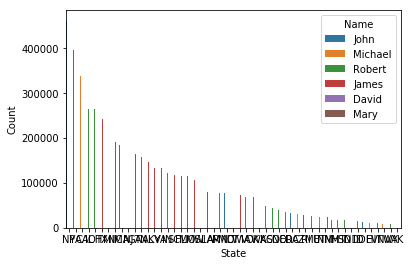

In [36]:
#visualization step
#before 1990
sns.barplot(x='State', y='Count', hue='Name', data=before1990_sorted)

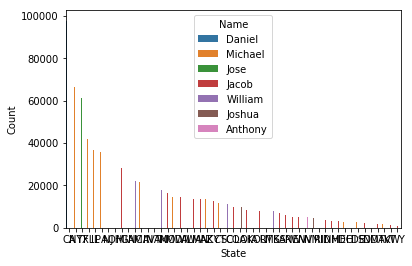

In [37]:
#visualization step
#after 1990
sns.barplot(x='State', y='Count', hue='Name', data=after1990_sorted)

# 2 which are top 3 of the most popular names in 1990-2000 years separately among boys and girls in three states selected by you

In [124]:
#first we choose rows for boys and girls born from 1990 to 2000

top3_f = df[(df.Year >= 1990) & (df.Year <= 2000) & (df.Gender == "F") ]
top3_m = df[(df.Year >= 1990) & (df.Year <= 2000) & (df.Gender == "M") ]
#grop them by states 
top3_m = top3_m.groupby(['State', 'Name', 'Gender'], as_index=False).aggregate({'Count':'sum'})
top3_f = top3_f.groupby(['State', 'Name', 'Gender'], as_index=False).aggregate({'Count':'sum'})
#sort
top3_m = top3_m.sort_values(by=['Count'],ascending=False)
top3_f = top3_f.sort_values(by=['Count'],ascending=False)


In [134]:
#FL f
top3_f_FL = top3_f.loc[top3_f['State'] == 'FL']
top3_f_FL=top3_f_FL.nlargest(3, 'Count')
top3_f_FL


,State,Name,Gender,Count
12796,FL,Michael,M,26714
11501,FL,Christopher,M,21725
12405,FL,Joshua,M,19044


In [135]:
#FL m
top3_m_FL = top3_m.loc[top3_m['State'] == 'FL']
top3_m_FL=top3_m_FL.nlargest(3, 'Count')
top3_m_FL

,State,Name,Gender,Count
12796,FL,Michael,M,26714
11501,FL,Christopher,M,21725
12405,FL,Joshua,M,19044


In [132]:
#NY f
top3_f_NY = top3_f.loc[top3_f['State'] == 'NY']
top3_f_NY=top3_f_NY.nlargest(3, 'Count')
top3_f_NY

,State,Name,Gender,Count
39885,NY,Michael,M,46185
38251,NY,Christopher,M,31879
39836,NY,Matthew,M,31389


In [ ]:
#NY m
top3_m_NY = top3_m.loc[top3_m['State'] == 'NY']
top3_m_NY=top3_m_NY.nlargest(3, 'Count')
top3_m_NY

In [133]:
#TX f
top3_f_TX = top3_f.loc[top3_f['State'] == 'TX']
top3_f_TX=top3_f_TX.nlargest(3, 'Count')
top3_f_TX

,State,Name,Gender,Count
51764,TX,Michael,M,32957
50063,TX,Christopher,M,31702
51264,TX,Jose,M,30475


In [136]:
#TX m
top3_m_TX = top3_m.loc[top3_m['State'] == 'TX']
top3_m_TX=top3_m_TX.nlargest(3, 'Count')
top3_m_TX

,State,Name,Gender,Count
51764,TX,Michael,M,32957
50063,TX,Christopher,M,31702
51264,TX,Jose,M,30475


# 3  dynamics of three names selected by you in those three states starting from 1990 year

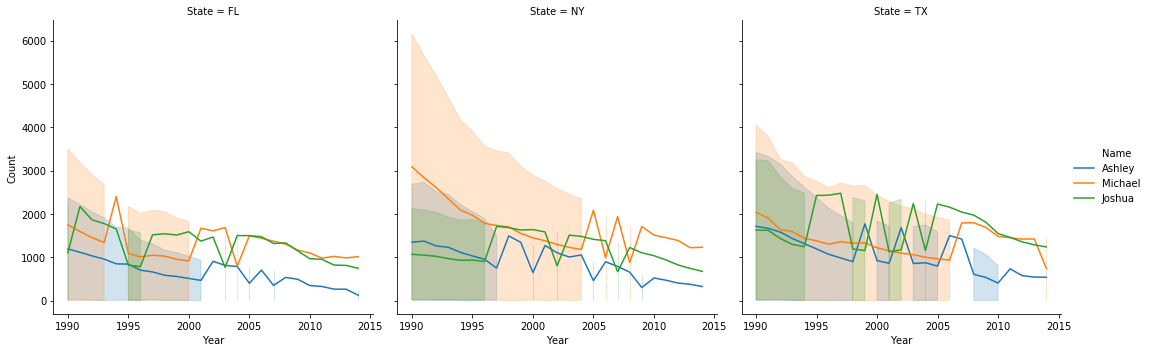

In [148]:
#First we create the subset for FL
names = df[df.Year>=1990]
names = names[(names['State']=='FL') | (names['State']=='TX') | (names['State']=='NY')]
names = names[(names['Name']=='Michael') | (names['Name']=='Ashley') | (names['Name']=='Joshua')]

#create plot
ax = sns.relplot(x='Year', y='Count', hue='Name', col ='State', kind="line", data=names)